In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Lettura file e preprocessing

In [3]:
df = pd.read_csv('../Bank Marketing.csv')
df.shape

(45211, 17)

In [4]:
# Eliminazione colonne superflue
df_clustering = df.drop(columns=['Contact', 'Last Contact Day', 'Last Contact Month', 'Last Contact Duration', 'Campaign', 'Pdays'])

In [5]:
# Trasformo tutti i dati del dataframe in interi
df_encoded = df_clustering.copy()

label_encoder = LabelEncoder()

for column in df_clustering.columns:
    if df_clustering[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_clustering[column])

In [6]:
# Normalizzo il dataframe
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_encoded)
df_normalized = pd.DataFrame(df_normalized, columns=df_encoded.columns)

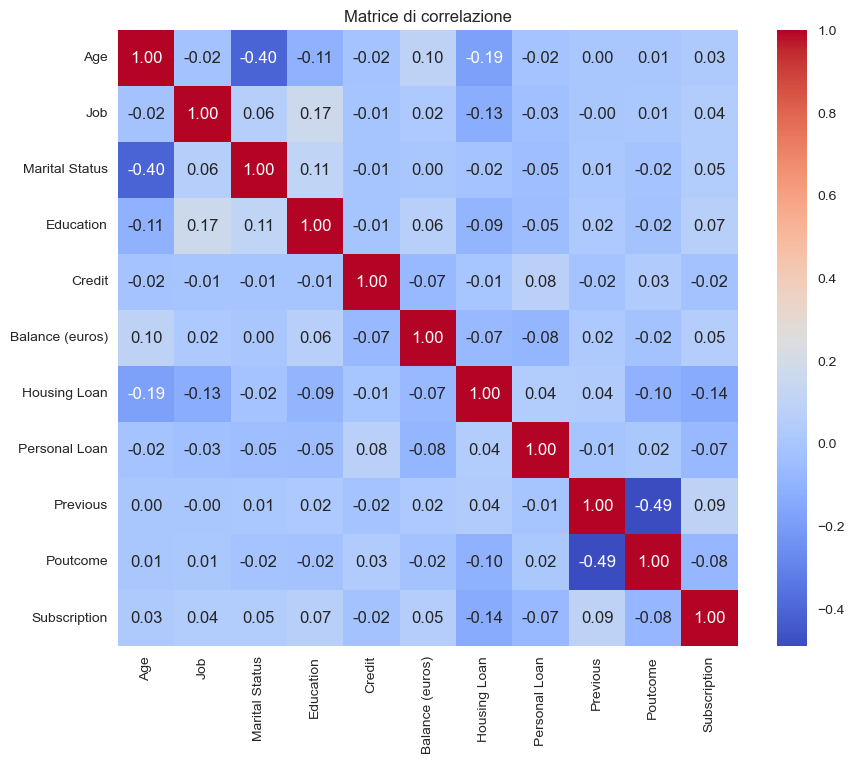

In [7]:
# Calcolo e visualizzo la matrice di correlazione
correlation_matrix = df_normalized.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di correlazione')
plt.show()

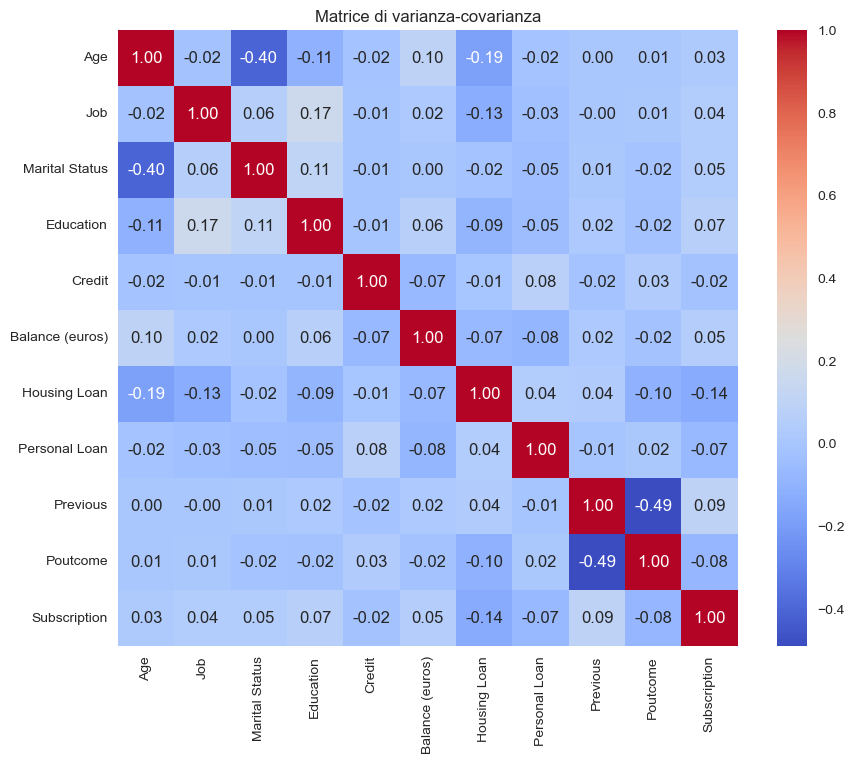

In [8]:
# Calcolo e visualizzo la matrice di varianza-covarianza
covariance_matrix = np.cov(df_normalized, rowvar=False)

feature_names = df_normalized.columns
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=feature_names, yticklabels=feature_names)
plt.title('Matrice di varianza-covarianza')
plt.show()

# # KMEANS con 2 dimensioni

In [9]:
pca = PCA(n_components=2)
np_pca = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(np_pca)

In [10]:
# Eliminazione outlier
indice = df_pca[df_pca[0] > 40].index
df_pca = df_pca.drop(indice)
df = df.drop(indice)

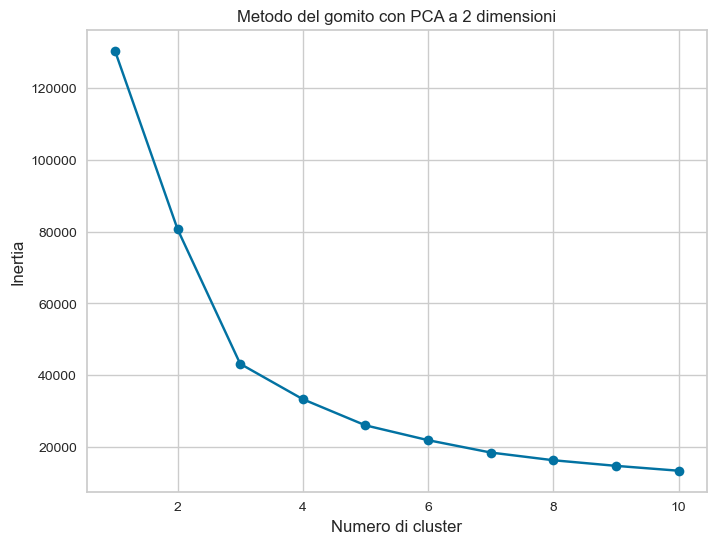

In [11]:
# Metodo del gomito per trovare numero ottimale di cluster
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Numero di cluster')
plt.ylabel('Inertia')
plt.title('Metodo del gomito con PCA a 2 dimensioni')
plt.grid(True)
plt.show()

In [12]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_pca)
cluster_labels = kmeans.labels_

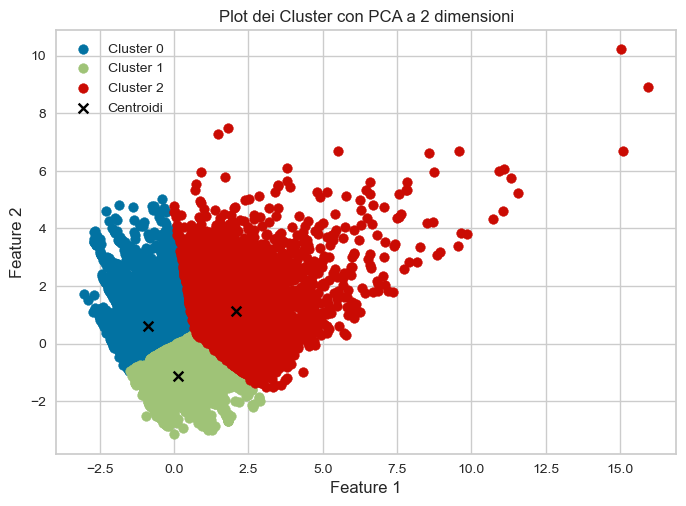

In [13]:
# Plot dei cluster
for cluster in range(n_clusters):
    cluster_data = df_pca[cluster_labels == cluster]
    plt.scatter(cluster_data[0], cluster_data[1], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Centroidi')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot dei Cluster con PCA a 2 dimensioni')
plt.legend()
plt.show()

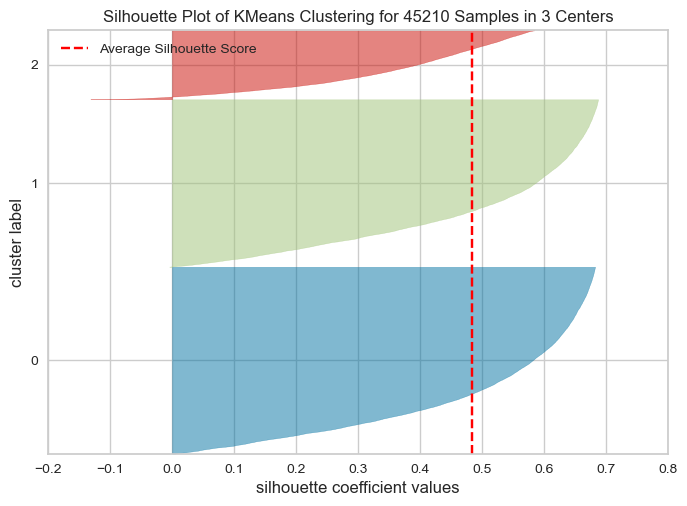

Punteggio Silhouette medio: 0.4838334540029854


In [14]:
# Calcolo e stampo silhouette
silhouette_avg = silhouette_score(df_pca, cluster_labels)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_pca)
visualizer.show()
print("Punteggio Silhouette medio:", silhouette_avg)

# KMEANS con 3 dimensioni

In [15]:
pca = PCA(n_components=3)
np_pca = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(np_pca)

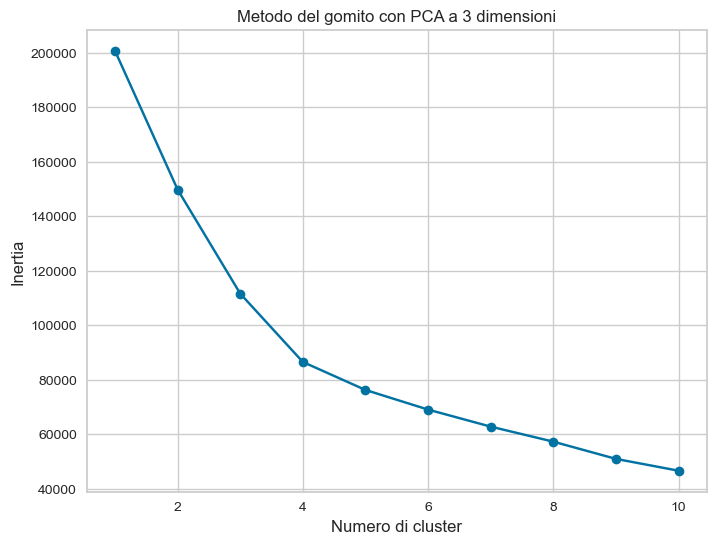

In [16]:
# Metodo del gomito
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Numero di cluster')
plt.ylabel('Inertia')
plt.title('Metodo del gomito con PCA a 3 dimensioni')
plt.grid(True)
plt.show()

In [17]:
# Eliminazione rumore (un solo punto che faceva stampare male il grafico)
df_pca = df_pca.drop(df_pca[df_pca[0] > 60].index)

In [18]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_pca)
cluster_labels = kmeans.labels_

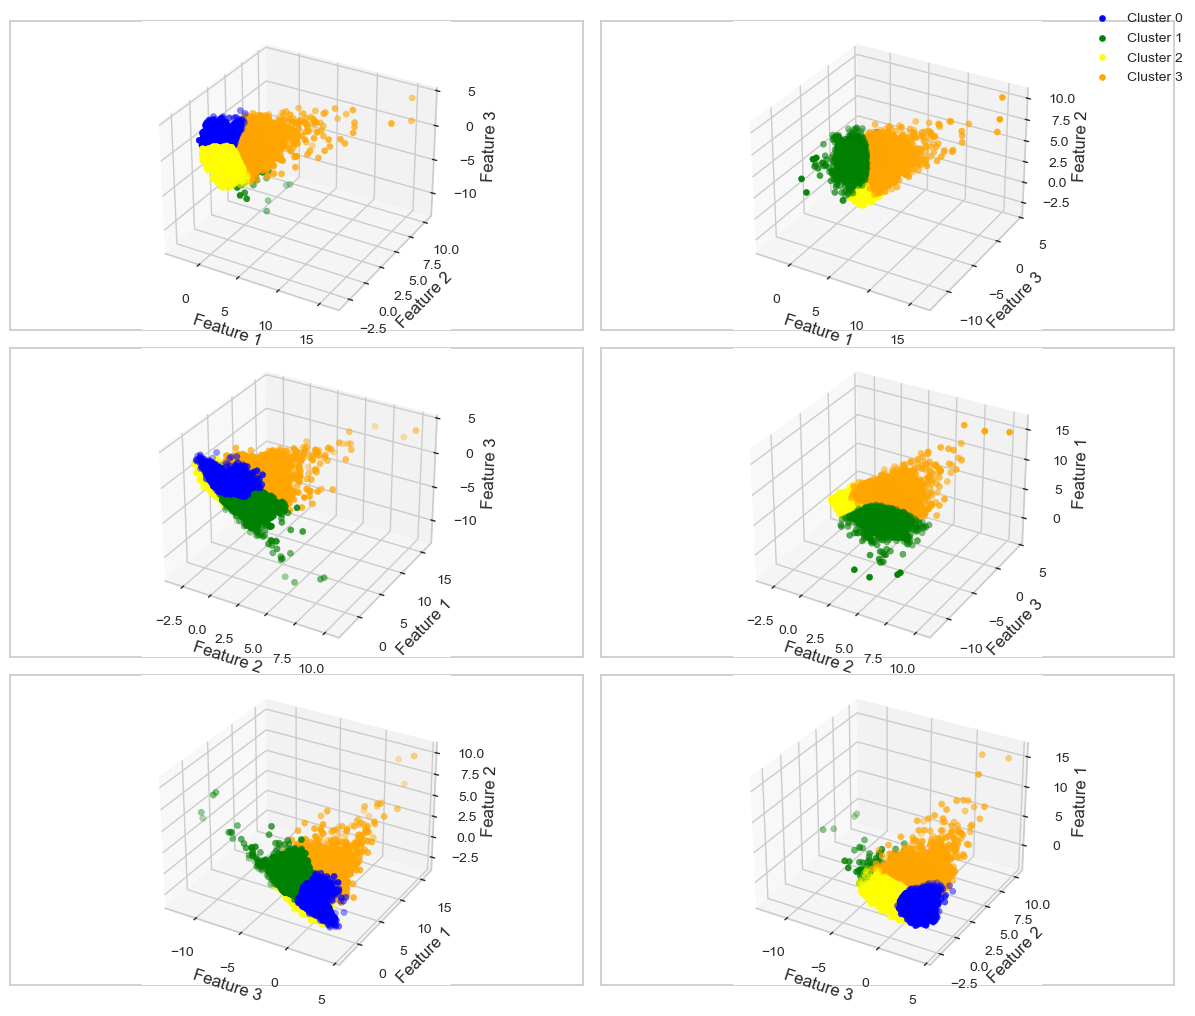

In [19]:
# Plot dei grafici
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
colors = ['blue', 'green', 'yellow', 'orange']
legend_handles = []
for ax in axs:
    for asse in ax:
        asse.set_xticks([])
        asse.set_yticks([])

ax_1 = fig.add_subplot(3, 2, 1, projection='3d')
ax_1.set_xlabel('Feature 1')
ax_1.set_ylabel('Feature 2')
ax_1.set_zlabel('Feature 3')

ax_2 = fig.add_subplot(3, 2, 2, projection='3d')
ax_2.set_xlabel('Feature 1')
ax_2.set_ylabel('Feature 3')
ax_2.set_zlabel('Feature 2')

ax_3 = fig.add_subplot(3, 2, 3, projection='3d')
ax_3.set_xlabel('Feature 2')
ax_3.set_ylabel('Feature 1')
ax_3.set_zlabel('Feature 3')

ax_4 = fig.add_subplot(3, 2, 4, projection='3d')
ax_4.set_xlabel('Feature 2')
ax_4.set_ylabel('Feature 3')
ax_4.set_zlabel('Feature 1')

ax_5 = fig.add_subplot(3, 2, 5, projection='3d')
ax_5.set_xlabel('Feature 3')
ax_5.set_ylabel('Feature 1')
ax_5.set_zlabel('Feature 2')

ax_6 = fig.add_subplot(3, 2, 6, projection='3d')
ax_6.set_xlabel('Feature 3')
ax_6.set_ylabel('Feature 2')
ax_6.set_zlabel('Feature 1')

for cluster in range(n_clusters):
    cluster_data = df_pca[cluster_labels == cluster]
    feat_1 = cluster_data[0]
    feat_2 = cluster_data[1]
    feat_3 = cluster_data[2]
    legend_handles.append(ax_1.scatter(feat_1, feat_2, feat_3, label=f'Cluster {cluster}',c=colors[cluster]))
    ax_2.scatter(feat_1, feat_3, feat_2, label=f'Cluster {cluster}',c=colors[cluster])
    ax_3.scatter(feat_2, feat_1, feat_3, label=f'Cluster {cluster}',c=colors[cluster])
    ax_4.scatter(feat_2, feat_3, feat_1, label=f'Cluster {cluster}',c=colors[cluster])
    ax_5.scatter(feat_3, feat_1, feat_2, label=f'Cluster {cluster}',c=colors[cluster])
    ax_6.scatter(feat_3, feat_2, feat_1, label=f'Cluster {cluster}',c=colors[cluster])

fig.legend(handles=legend_handles,loc='upper right')
plt.tight_layout()
plt.show()


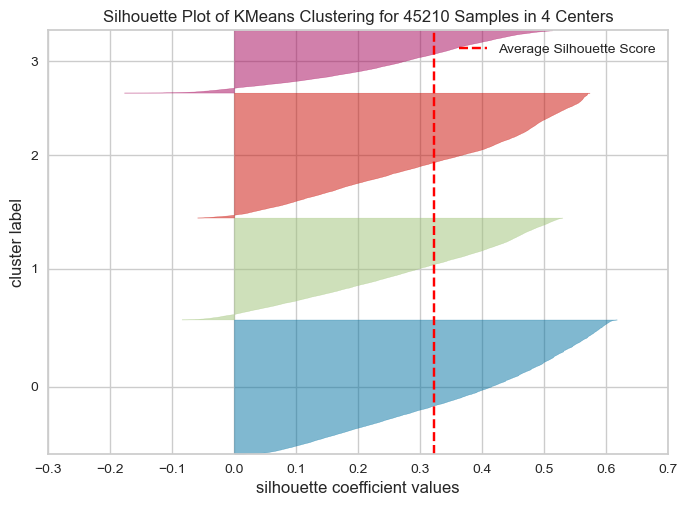

Punteggio Silhouette medio: 0.3229033814851811


In [20]:
# Calcolo della silhouette
silhouette_avg = silhouette_score(df_pca, cluster_labels)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_pca)
visualizer.show()
print("Punteggio Silhouette medio:", silhouette_avg)

## Il migliore clustering è quello a 2 dimensioni della PCA, andiamo ad analizzare quello

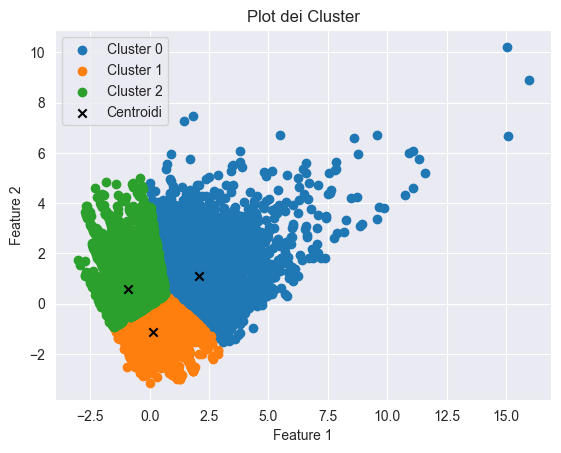

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
np_pca = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(np_pca)
df_pca = df_pca.drop(df_pca[df_pca[0] > 40].index)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)

# Addestramento del modello
kmeans.fit(df_pca)

# Ottenere le etichette dei cluster
cluster_labels = kmeans.labels_

# Plot dei cluster
for cluster in range(n_clusters):
    cluster_data = df_pca[cluster_labels == cluster]
    plt.scatter(cluster_data[0], cluster_data[1], label=f'Cluster {cluster}')

# Plot del centroide di ogni cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Centroidi')

# Aggiungi etichette e legenda
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot dei Cluster')
plt.legend()

# Mostra il plot
plt.show()

In [12]:
df['Cluster']=cluster_labels

In [13]:
# Dividi il DataFrame in base al valore della colonna 'Cluster'
gruppi = df.groupby('Cluster')

# Ottieni i DataFrame per ciascun gruppo
df_cluster_0 = gruppi.get_group(0)
df_cluster_1 = gruppi.get_group(1)
df_cluster_2 = gruppi.get_group(2)

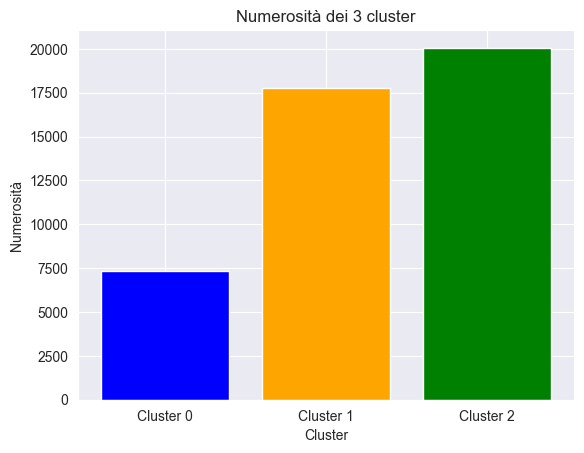

In [15]:
import matplotlib.pyplot as plt

# Calcola le numerosità dei tre cluster
num_cluster_0 = len(df_cluster_0)
num_cluster_1 = len(df_cluster_1)
num_cluster_2 = len(df_cluster_2)

# Etichette dei cluster
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# Altezze delle barre
heights = [num_cluster_0, num_cluster_1, num_cluster_2]

# Disegna il grafico a barre
plt.bar(labels, heights, color=['blue', 'orange', 'green'])
plt.xlabel('Cluster')
plt.ylabel('Numerosità')
plt.title('Numerosità dei 3 cluster')
plt.show()


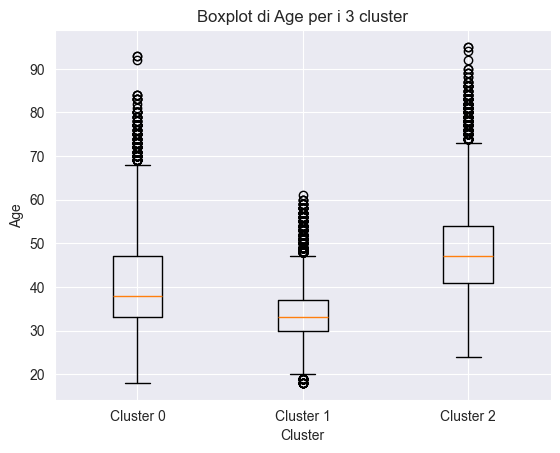

In [16]:
import matplotlib.pyplot as plt

# Dati per i boxplot
data = [df_cluster_0['Age'], df_cluster_1['Age'], df_cluster_2['Age']]

# Etichette dei cluster
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# Disegna il boxplot
plt.boxplot(data, labels=labels)
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Boxplot di Age per i 3 cluster')
plt.show()


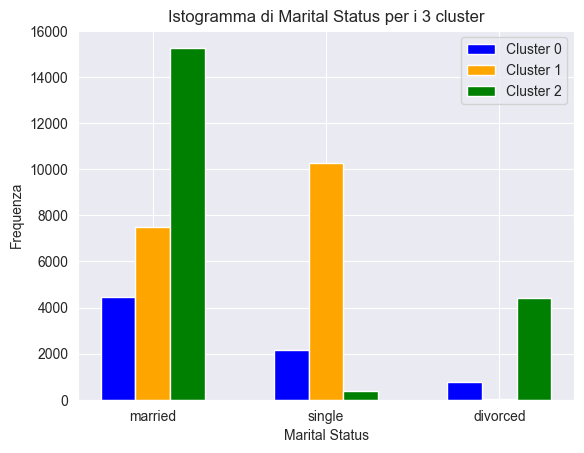

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Valori unici dell'attributo 'Marital Status'
unique_marital_status = df['Marital Status'].unique()

# Conta le frequenze di ciascun valore di 'Marital Status' per ogni cluster
frequencies_cluster_0 = [df_cluster_0[df_cluster_0['Marital Status'] == status].shape[0] for status in unique_marital_status]
frequencies_cluster_1 = [df_cluster_1[df_cluster_1['Marital Status'] == status].shape[0] for status in unique_marital_status]
frequencies_cluster_2 = [df_cluster_2[df_cluster_2['Marital Status'] == status].shape[0] for status in unique_marital_status]

# Posizioni delle barre
x = np.arange(len(unique_marital_status))

# Larghezza delle barre
bar_width = 0.2

# Disegna gli istogrammi
plt.bar(x - bar_width, frequencies_cluster_0, width=bar_width, align='center', label='Cluster 0', color='blue')
plt.bar(x, frequencies_cluster_1, width=bar_width, align='center', label='Cluster 1', color='orange')
plt.bar(x + bar_width, frequencies_cluster_2, width=bar_width, align='center', label='Cluster 2', color='green')

# Personalizza il grafico
plt.xlabel('Marital Status')
plt.ylabel('Frequenza')
plt.title('Istogramma di Marital Status per i 3 cluster')
plt.xticks(x, unique_marital_status)
plt.legend()

# Mostra il grafico
plt.show()


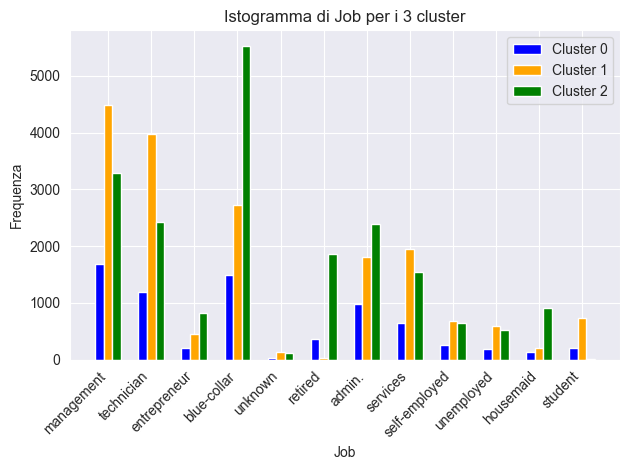

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Valori unici dell'attributo 'Job'
unique_jobs = df['Job'].unique()

# Conta le frequenze di ciascun valore di 'Job' per ogni cluster
frequencies_cluster_0 = [df_cluster_0[df_cluster_0['Job'] == job].shape[0] for job in unique_jobs]
frequencies_cluster_1 = [df_cluster_1[df_cluster_1['Job'] == job].shape[0] for job in unique_jobs]
frequencies_cluster_2 = [df_cluster_2[df_cluster_2['Job'] == job].shape[0] for job in unique_jobs]

# Posizioni delle barre
x = np.arange(len(unique_jobs))

# Larghezza delle barre
bar_width = 0.2

# Disegna gli istogrammi
plt.bar(x - bar_width, frequencies_cluster_0, width=bar_width, align='center', label='Cluster 0', color='blue')
plt.bar(x, frequencies_cluster_1, width=bar_width, align='center', label='Cluster 1', color='orange')
plt.bar(x + bar_width, frequencies_cluster_2, width=bar_width, align='center', label='Cluster 2', color='green')

# Personalizza il grafico
plt.xlabel('Job')
plt.ylabel('Frequenza')
plt.title('Istogramma di Job per i 3 cluster')
plt.xticks(x, unique_jobs, rotation=45, ha='right')
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()


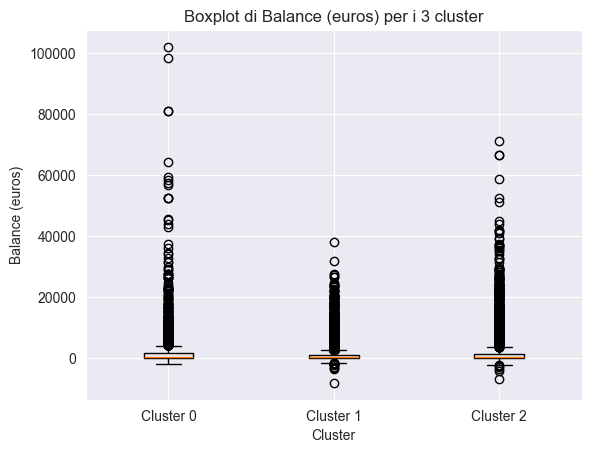

In [21]:
import matplotlib.pyplot as plt

# Dati per i boxplot
data = [df_cluster_0['Balance (euros)'], df_cluster_1['Balance (euros)'], df_cluster_2['Balance (euros)']]

# Etichette dei cluster
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']

# Disegna il boxplot
plt.boxplot(data, labels=labels)
plt.xlabel('Cluster')
plt.ylabel('Balance (euros)')
plt.title('Boxplot di Balance (euros) per i 3 cluster')
plt.show()


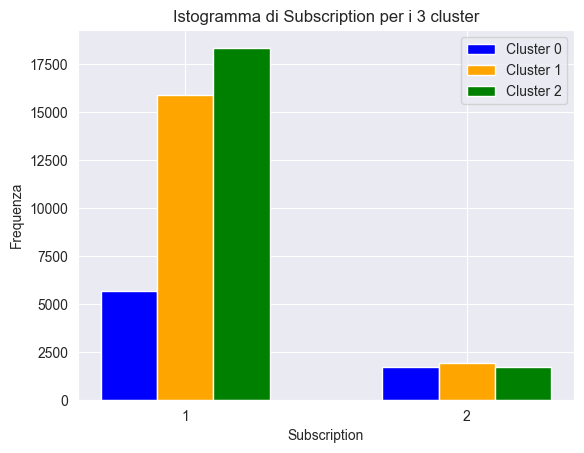

In [24]:
import matplotlib.pyplot as plt

# Valori unici dell'attributo 'Subscription'
unique_subscription = df['Subscription'].unique()

# Conta le frequenze di ciascun valore di 'Subscription' per ogni cluster
frequencies_cluster_0 = [df_cluster_0[df_cluster_0['Subscription'] == sub].shape[0] for sub in unique_subscription]
frequencies_cluster_1 = [df_cluster_1[df_cluster_1['Subscription'] == sub].shape[0] for sub in unique_subscription]
frequencies_cluster_2 = [df_cluster_2[df_cluster_2['Subscription'] == sub].shape[0] for sub in unique_subscription]

# Posizioni delle barre
x = list(range(len(unique_subscription)))  # Converti range in lista di interi

# Larghezza delle barre
bar_width = 0.2

# Disegna gli istogrammi
plt.bar([val - bar_width for val in x], frequencies_cluster_0, width=bar_width, align='center', label='Cluster 0', color='blue')
plt.bar(x, frequencies_cluster_1, width=bar_width, align='center', label='Cluster 1', color='orange')
plt.bar([val + bar_width for val in x], frequencies_cluster_2, width=bar_width, align='center', label='Cluster 2', color='green')

# Personalizza il grafico
plt.xlabel('Subscription')
plt.ylabel('Frequenza')
plt.title('Istogramma di Subscription per i 3 cluster')
plt.xticks(x, unique_subscription)
plt.legend()

# Mostra il grafico
plt.show()

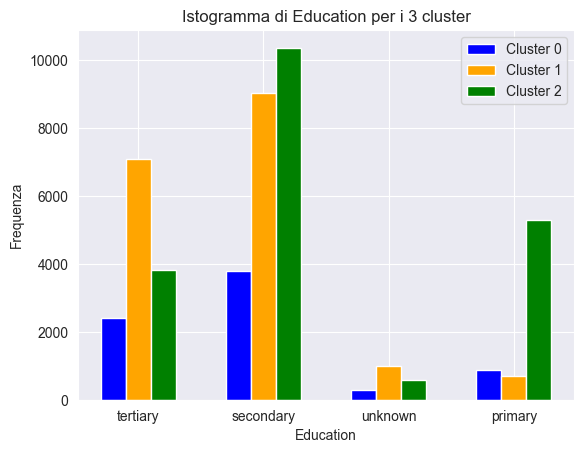

In [26]:
import matplotlib.pyplot as plt

# Valori unici dell'attributo 'Education'
unique_education = df['Education'].unique()

# Conta le frequenze di ciascun valore di 'Education' per ogni cluster
frequencies_cluster_0 = [df_cluster_0[df_cluster_0['Education'] == edu].shape[0] for edu in unique_education]
frequencies_cluster_1 = [df_cluster_1[df_cluster_1['Education'] == edu].shape[0] for edu in unique_education]
frequencies_cluster_2 = [df_cluster_2[df_cluster_2['Education'] == edu].shape[0] for edu in unique_education]

# Posizioni delle barre
x = list(range(len(unique_education)))  # Converti range in lista di interi

# Larghezza delle barre
bar_width = 0.2

# Disegna gli istogrammi
plt.bar([val - bar_width for val in x], frequencies_cluster_0, width=bar_width, align='center', label='Cluster 0', color='blue')
plt.bar(x, frequencies_cluster_1, width=bar_width, align='center', label='Cluster 1', color='orange')
plt.bar([val + bar_width for val in x], frequencies_cluster_2, width=bar_width, align='center', label='Cluster 2', color='green')

# Personalizza il grafico
plt.xlabel('Education')
plt.ylabel('Frequenza')
plt.title('Istogramma di Education per i 3 cluster')
plt.xticks(x, unique_education)
plt.legend()

# Mostra il grafico
plt.show()


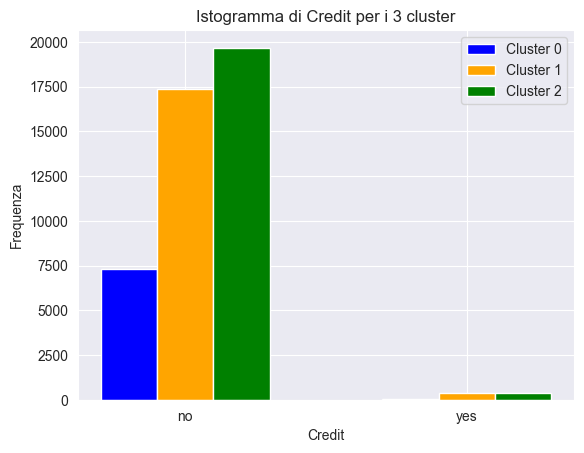

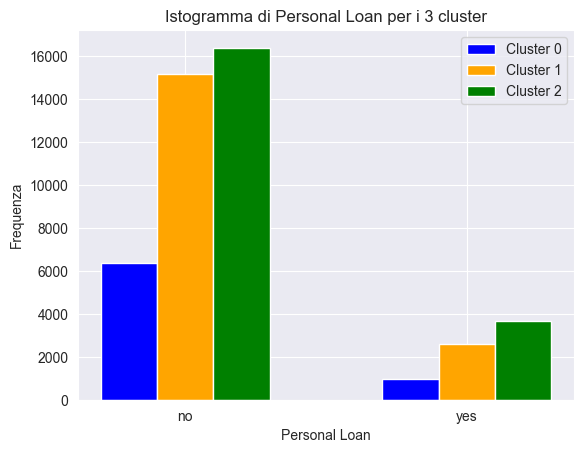

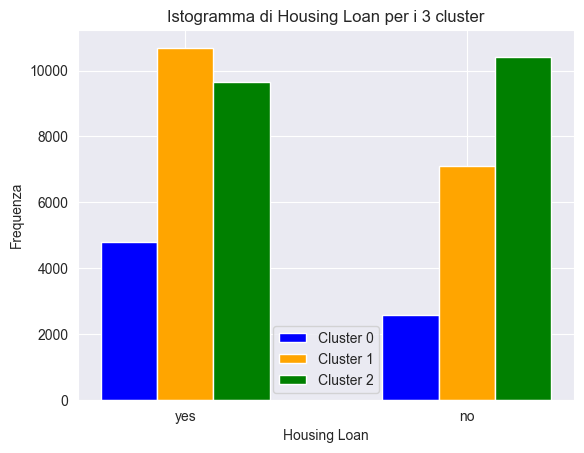

In [27]:
import matplotlib.pyplot as plt

# Lista degli attributi
attributes = ['Credit', 'Personal Loan', 'Housing Loan']

for attribute in attributes:
    # Valori unici dell'attributo
    unique_values = df[attribute].unique()

    # Conta le frequenze di ciascun valore dell'attributo per ogni cluster
    frequencies_cluster_0 = [df_cluster_0[df_cluster_0[attribute] == val].shape[0] for val in unique_values]
    frequencies_cluster_1 = [df_cluster_1[df_cluster_1[attribute] == val].shape[0] for val in unique_values]
    frequencies_cluster_2 = [df_cluster_2[df_cluster_2[attribute] == val].shape[0] for val in unique_values]

    # Posizioni delle barre
    x = list(range(len(unique_values)))  # Converti range in lista di interi

    # Larghezza delle barre
    bar_width = 0.2

    # Disegna gli istogrammi
    plt.bar([val - bar_width for val in x], frequencies_cluster_0, width=bar_width, align='center', label='Cluster 0', color='blue')
    plt.bar(x, frequencies_cluster_1, width=bar_width, align='center', label='Cluster 1', color='orange')
    plt.bar([val + bar_width for val in x], frequencies_cluster_2, width=bar_width, align='center', label='Cluster 2', color='green')

    # Personalizza il grafico
    plt.xlabel(attribute)
    plt.ylabel('Frequenza')
    plt.title(f'Istogramma di {attribute} per i 3 cluster')
    plt.xticks(x, unique_values)
    plt.legend()

    # Mostra il grafico
    plt.show()


In [25]:
df_cluster_0.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription,Cluster
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,2,0
920,44,admin.,married,secondary,no,58544,yes,no,unknown,7,may,144,2,-1,0,unknown,1,0
3197,43,admin.,single,secondary,no,56831,no,no,unknown,15,may,243,1,-1,0,unknown,1,0
15869,38,admin.,single,tertiary,no,45789,no,no,telephone,21,jul,21,31,-1,0,unknown,1,0
19282,42,technician,married,tertiary,no,14282,yes,no,cellular,6,aug,649,4,-1,0,unknown,2,0
